<a href="https://colab.research.google.com/github/eperezd/data_analisis_peru/blob/main/planes_gobierno_sanmartin2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Nube de palabras 

> Usando matplotlib

En esta oportunidad realizaremos un analisis de las palbras expuestas en los diferentes planes de gobierno presentados al JNE, para las elecciones municipales y Regionales del 2022, para el Gobierno Regional de San Martin 2022

In [ ]:
# importamos las librerias que vamos a utilizar
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
nltk.download('book')
from nltk.book import *
from nltk.corpus import stopwords
from wordcloud import WordCloud

Adjuntamos nuestro archivo a analizar

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving plangobiernogrundel.csv to plangobiernogrundel.csv


los mencionados planes de gobirnos se encuentran publicados en la pagina oficial del JNE, de donde su pueden descarar en formato pdf, tendraimmos que convertirlo a CSV y luego subirlo.

In [ ]:
# visualizamos nuestros datos
df = pd.read_csv(io.BytesIO(uploaded["plangobiernogrundel.csv"]))
df

,Firmado Digitalmente por:
0,ATENCIO DIAZ ALEXIS
1,BRYAN
2,Razón: Soy autor del
3,documento
4,Fecha: 17/06/2022
...,...
3214,NaN
3215,“ES TIEMPO DE TODOS”
3216,NaN
3217,JUNTOS LO LOGRAREMOS


In [ ]:
df.head()

,Firmado Digitalmente por:
0,ATENCIO DIAZ ALEXIS
1,BRYAN
2,Razón: Soy autor del
3,documento
4,Fecha: 17/06/2022


Damos formato a nuestros datos, modificando las columnas, eliminado los datos vacios, NaN y guardando en nuevo dataframe que es donde lo vamos a utilizar.

In [ ]:
texto= df.rename(columns={'Firmado Digitalmente por:':'texto'})
texto.columns

Index(['texto'], dtype='object')

In [ ]:
# visualizamos nuestros datos
texto.head()

,texto
0,ATENCIO DIAZ ALEXIS
1,BRYAN
2,Razón: Soy autor del
3,documento
4,Fecha: 17/06/2022


In [ ]:
df.shape

(3219, 1)

In [ ]:
texto1= texto.dropna()
texto1.head()

,texto
0,ATENCIO DIAZ ALEXIS
1,BRYAN
2,Razón: Soy autor del
3,documento
4,Fecha: 17/06/2022


In [ ]:
texto1.shape

(2604, 1)

## stopword, nos ofrece  la oportunidad de quitar de nuestro texto, las palabras que no presentan valor para nuestra nube de palabras, como son, proposiciones, articulos, conjuciones, etc.

In [ ]:
print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

nuestro texto, lo agregamos a uns arreglo, en donde podemos contar nuestras palabras para poder mapearlos

In [ ]:
textos_plan = ''
for row in texto1['texto']: 
    textos_plan = textos_plan + ' ' + row

en nuestra variable, que designaremos como "y", adjuntamos nuestras palabras excluidas, en stopwords del idioma español, y tambien adjuntamos a esta lista, palbras que podrian aparecer y que no generarian valor para el sentido de esta visualizacion, como son "'2020','sistema' ,'2021','2022','región','regional','cont','martín','somos','peru','perú','san martín','partido','democrático']"

In [ ]:
y = stopwords.words('spanish') + ['2020','sistema' ,'2021','2022','región','regional','cont','martin','somos','peru','perú','partido','democrático']

unimos nuestros resultados en nuevo dataframe.

In [ ]:
textos_plan = ' '.join([x for x in textos_plan.strip().lower().split(' ') if x not in y and len(x)>4])

Graficamos nuestros resultados

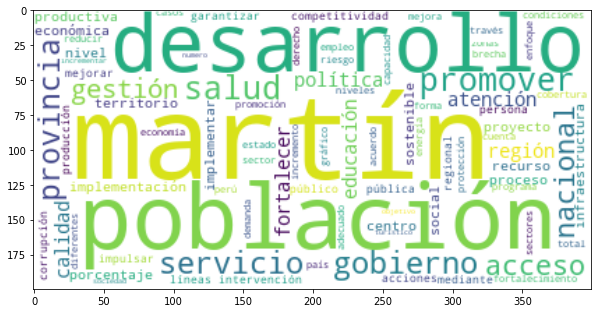

In [ ]:
wc = WordCloud(background_color= 'white')
wc.generate(textos_plan)
#plt.axis("off")
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.show()